<div style="text-align:center">
  <img src="https://raw.githubusercontent.com/Comrade26/Interesting_data_project/main/team7_assgn1/logo_laber.jpg" alt="alt text">
  <h5>แหล่งข้อมูลที่มา : https://ldls.mol.go.th/main</h5>
</div>

<table align="center">
    <tr>
      <th>Import module</th>
      <th>Description</th>
    </tr>
    <tr>
      <td>import sys</td>
      <td>ใช้ในการบอก python version</td>
    </tr>
    <tr>
      <td>import re</td>
      <td>ใช้ในการ search หา str ใน text</td>
    </tr>
    <tr>
      <td>import requests</td>
      <td>ใช้ในการส่งคำขอเพื่อสามารถใช้ link URL ได้</td>
    </tr>
    <tr>
      <td>import numpy</td>
      <td>ใช้ในการจัดรูปแบบกราฟวิเคราะห์ข้อมูล</td>
    </tr>
    <tr>
      <td>import pandas</td>
      <td>ใช้ในการจัดการข้อมูลที่เป็น dataframe</td>
    </tr>    
    <tr>
      <td>import seaborn</td>
      <td>ใช้ในการทำรูปแบบกราฟต่าง ๆ ของข้อมูล</td>
    </tr>
    <tr>
      <td>import datetime</td>
      <td>ใช้ในการบอกเวลาครั้งสุดท้ายที่ run</td>
    </tr>
    <tr>
      <td>import matplotlib</td>
      <td>ใช้ในการคำนวณและ plot กราd</td>
    </tr>
    <tr>
      <td>import ipywidgets</td>
      <td>ใช้ในการสร้างกราฟแบบ interactive</td>
    </tr>     
</table>

In [1]:
import sys
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import datetime
import ipywidgets

<table align="center">
    <tr>
      <th>Import module</th>
      <th>Version</th>
    </tr>
    <tr>
      <td>import sys</td>
      <td> 3.9.16</td>
    </tr>
    <tr>
      <td>import re</td>
      <td>2.2.1</td>
    </tr>
    <tr>
      <td>import requests</td>
      <td>2.28.1</td>
    </tr>
    <tr>
      <td>import numpy</td>
      <td>1.21.5</td>
    </tr>
    <tr>
      <td>import pandas</td>
      <td>1.5.2</td>
    </tr>    
    <tr>
      <td>import seaborn</td>
      <td>0.12.2</td>
    </tr>
    <tr>
      <td>import datetime</td>
      <td>3.6.2</td>
    </tr>
    <tr>
      <td>import ipywidgets</td>
      <td>7.6.5</td>
    </tr>
</table>

In [2]:
print(f'python version = {sys.version}')
print(f're version = {re.__version__}')
print(f'requests version = {requests.__version__}')
print(f'numpy version = {np.__version__}')
print(f'pandas version = {pd.__version__}')
print(f'seaborn version = {sns.__version__}')
print(f'matplotlib version = {matplotlib.__version__}')
print(f'ipywidgets version = {ipywidgets.__version__}')
print(f'last run = {datetime.date.today()}')

python version = 3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)]
re version = 2.2.1
requests version = 2.28.1
numpy version = 1.21.5
pandas version = 1.5.2
seaborn version = 0.12.2
matplotlib version = 3.6.2
ipywidgets version = 7.6.5
last run = 2023-01-31


# Read CSV file
อ่านไฟล์ CSV ที่ดึงมาจากเว็บ https://ldls.mol.go.th/main กระทรวงแรงงาน ในหัวข้อเรื่อง <mark style="background-color: darkgrey; color: black;">ความต้องการ การจ้างงานในแรงงานไทยของแต่ละสาขาวิชา ของป.ตรี</mark> ทั้งหมด 3 ไฟล์ ประกอบด้วยข้อมูลสาขาวิชาของป.ตรี ตั้งแต่ปี 2563-2565

In [3]:
url = 'https://api.github.com/repos/Comrade26/Interesting_data_project/contents/team7_assgn1/data/'
response = requests.get(url)
list_data_name = []
list_data = []

if response.status_code == 200:
    files = response.json()
    for file in files:
        list_data_name.append(file['name'][:-4])
        list_data.append(pd.read_csv(file['download_url']))
        # data ปี 2563 เป็น index ที่ 0 ใน list_data_name ซึ่งจะเท่ากับ list_data index ที่ 0 ซึ่งเป็น dataframe และจะสามารถรู้ข้อมูลที่อยู่ในปี 2563
else:
    print(response.json()['message'])

- การทดสอบข้อมูล Ex. ข้อมูลความต้องการ การจ้างงานในแรงงานไทยของแต่ละสาขาวิชา ของป.ตรี ของปี 2564

In [4]:
list_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   สาขาวิชา             96 non-null     object
 1   ชาย                  96 non-null     int64 
 2   หญิง                 96 non-null     int64 
 3   ไม่ระบุเพศ           96 non-null     int64 
 4   แรงงานไทย            96 non-null     int64 
 5   แรงงานต่างด้าว       96 non-null     int64 
 6   แรงงานที่ต้องการรวม  96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [5]:
list_data[0]

,สาขาวิชา,ชาย,หญิง,ไม่ระบุเพศ,แรงงานไทย,แรงงานต่างด้าว,แรงงานที่ต้องการรวม
0,ปวส. ช่างเทคนิคอุตสาหกรรมเปโตรเคมี,20,4,0,24,0,24
1,ทุกสาขา,14,6,2,22,0,22
2,ปวส. ช่างอิเลกทรอนิกส์,10,10,0,20,0,20
3,ปวส. ช่างกลโรงงาน,12,0,2,14,0,14
4,ปวช. ช่างยนต์,11,0,0,11,0,11
...,...,...,...,...,...,...,...
91,ป.ตรีสังคมสิ่งแวดล้อม,0,0,1,1,0,1
92,ปริญญาตรีสาขาเทคโนโลยีการอาหาร หรือสาขาที่เกี...,0,0,1,1,0,1
93,ปวส. สาขาช่าง,0,0,1,1,0,1
94,ปวส. ช่างเครื่องกล,0,0,0,0,0,0


# List data importantly
การ clean data ขั้นที่ 1
- เปลี่ยนชื่อคอลัมน์จากภาษาไทยเป็นภาษาอังกฤษ ทำเพื่อให้เวลา plot กราฟ ไม่ต้องมีการกำหนด font
- ลบตัวอักษรบางตัวที่อาจก่อให้เกิด Error code เช่น " - " 

In [6]:
list_columns = ["Major", "Male", "Female", "Unknow_Gender", "Thai", "Non_Thai", "Total_Work_Demand"]
letter_box = ["-", "(", ")", "[", "]"]
for c in list_data:
    c.columns = list_columns
    for i in range(len(c.Major)):
        for letter in letter_box:
            c.loc[i, "Major"] = c.loc[i, "Major"].replace(letter, " ")


In [7]:
list_data[0]

,Major,Male,Female,Unknow_Gender,Thai,Non_Thai,Total_Work_Demand
0,ปวส. ช่างเทคนิคอุตสาหกรรมเปโตรเคมี,20,4,0,24,0,24
1,ทุกสาขา,14,6,2,22,0,22
2,ปวส. ช่างอิเลกทรอนิกส์,10,10,0,20,0,20
3,ปวส. ช่างกลโรงงาน,12,0,2,14,0,14
4,ปวช. ช่างยนต์,11,0,0,11,0,11
...,...,...,...,...,...,...,...
91,ป.ตรีสังคมสิ่งแวดล้อม,0,0,1,1,0,1
92,ปริญญาตรีสาขาเทคโนโลยีการอาหาร หรือสาขาที่เกี...,0,0,1,1,0,1
93,ปวส. สาขาช่าง,0,0,1,1,0,1
94,ปวส. ช่างเครื่องกล,0,0,0,0,0,0


# Clean Data
การ clean data ขั้นที่ 2
- การ clean data ขั้นนี้ทำเพื่อลบข้อมูลที่อาจจะผิดออกจาก data ของข้อมูลเดิม

In [8]:
not_want_word = ["ปวส", "ปวช", "ป.โท", "ช่าง", "สำนักงานใหญ๋", "วิชาชีพ", "ผู้ควบคุม", "ทั่วไป", "อาชีว", "ก่อสร้าง", "เชื่อมโลหะ", "เทคนิค", "แม่พิมพ์โลหะ", "ที่เกี่ยวข้อง", "ฝ่ายผลิต", "การผลิต", "ความปลอดภัย", "ช่่างยนต์", "สำนักงานใหญ่"]

list_cleaned_data = []
for c in list_data:
    cleaned_data = c.copy()
    for i in range(len(c)):
        match_not_wanted = re.search("|".join(not_want_word), c.Major[i])
        if match_not_wanted is not None:
            cleaned_data = cleaned_data.drop(i)
    cleaned_data = cleaned_data.dropna().reset_index(drop = True)
    list_cleaned_data.append(cleaned_data)

In [9]:
list_cleaned_data[0].head(10)

,Major,Male,Female,Unknow_Gender,Thai,Non_Thai,Total_Work_Demand
0,ทุกสาขา,14,6,2,22,0,22
1,ป.ตรีวิศวกรรมคอมพิวเตอร์,0,0,10,10,0,10
2,ป.ตรีวิศวกรรมไฟฟ้า / อิเล็กทรอนิกส์ / คอมพิวเตอร์,6,3,0,9,0,9
3,ป.ตรีวิศวกรรมไฟฟ้า,0,0,6,6,0,6
4,"ป.ตรีการบัญชี, บัญชีการเงิน",0,2,4,6,0,6
5,ป.ตรีวิศวกรรมไฟฟ้าและระบบ,0,0,5,5,0,5
6,วิศวโยธา,5,0,0,5,0,5
7,ป.ตรีเภสัชศาสตร์,0,0,4,4,0,4
8,ป.ตรีการตลาด,3,0,1,4,0,4
9,ป.ตรีการบัญชี,0,1,2,3,0,3


# Category of data
- การแยกประเภท data เพื่อใช้ในการ clean data ในลำดับถัดไป

In [10]:
data_category = {
'need_all': ["ทุกสาขา", "ไม่จำกัด", "ไม่กำหนด", "ไม่เน้น", "ปริญญาตรี", "สาขาใดก็ได้"],
'Management': ["yp=u","Finance" , "บันชี", "ตลาด", "การเงิน", "บัญชี", "บริหาร", "โลจิสติกส์", "การขาย", "ทรัพยากรมนุษย์", "เศรษฐศาสตร์", "การจัดการ", "logistic", "business", "accounting", "commerce", "พาณิช", "งานบุคคล", "การบันชี", "ธุรการ",],
'Engineer': ["วิศว", "engineer", "ไฟฟ้า", "เครื่องกล", "อุตสาหกรรม", "electrical", "อีเล็กทรอนิค", "อิเล็กทรอนิกส์","อิเล็กทรอนิค","อีเล็คทรอนิก", "ยานยนต์", "วิสว", "ไฟฟา", "อุตสาหการ", "โยธา", "rubber", "เครื่องจักร"],
'Science' : ["โพลิเมอร์", "วิทยาศาสตร์", "เทคโนโลยีอาหาร", "สาธาณะสุข", "วิทยาศาสรต์", "อาหารและโภชนาการ", "สังคมสิ่งแวดล้อม", "เกษตร", "เกษคร", "ประมง", "คณิตศาสตร์", "การประกันภัย", "เทคโนโลยีการบรรจุ", "data science", "เกษตรกรรม", "คหกรรมศาสตร์"],
'Computer' : ["computer", "it", "คอมพิวเตอร์", "สาร์นสนเทศน์", "programmer", "คอมฟิวเตอร์", "เทคโนโลยีสารสนเทศ"],
'Medicine' : ["เฉพาะทางด้านไตเทียม", "เภสัช", "แพทย์", "พยาบาล", "การดูแลเด็กและผู้สูงอายุ", "สัตวแพทย์", "สัตวแพทย", "รังสีเทคนิค", "ทันตแพทย", "กายภาพบำบัด", "สาธารณสุข", "สัตวศาสตร์"],
'Education' : ["มัธยมศึกษา", "ประถมศึกษา", "พัฒนาหลักสูตร", "ครุศาสตร์", "การสอน", "การศึกษา", "วิจัย", "การศึกษานอกระบบ", "เลขานุการ", "สื่อสารการศึกษา", "ศึกษาศาสตร์", "ปฐมวัย"],
'Arts' : ["ศิลปกรรม", "กราฟฟิกส์ดีไซด์", "ออกแบบ", "ศิลป", "กราฟฟิคดีไซน์", "design"],
'Architecture' : ["สถาปัต", "เขียนแบบ"],
'Literature' : ["ญี่ปุ่น", "ภาษาอังกฤษ", "การสื่อสาร", "ภาษาต่างประเทศ", "อักษรศาสตร์"],
'Humanities' : ["มนุษยศาสตร์", "มานุษยวิทยา", "มานุษยสงเคราะห์"],
'Laws' : ["นิติ", "เลขานุการ", "กฎหมาย", "รัฐศาสตร์", "laws"],
'Communication Arts' : ["ประชาสัมพันธ์", "นิเทศ", "สื่อสารมวลชน"],
'Music' : ["ดุริยาง", "ดนตรี"],
'Hospitality and Tourism' : ["การโรงแรม", "การบริการ", "สาขาท่องเที่ยว"],
}


# Group and Change lang Data
การ clean data ขั้นที่ 3
- การ clean data ขั้นที่ 3 เป็นการเปลี่ยนข้อมูลใน dataframe ให้แยกตามหมวดหมู่ตามที่เราเคยแยกหมวดหมู่ไว้ก่อนหน้านี้

In [11]:
for k in list_cleaned_data:
    for num in range(len(k.Major)):
        for i in range(len(data_category)):
            match = re.search("|".join(list(data_category.values())[i]), k.Major[num].lower())
            if match is not None:
                k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = list(data_category.keys())[i]

In [12]:
list_cleaned_data[0].head(10)

,Major,Male,Female,Unknow_Gender,Thai,Non_Thai,Total_Work_Demand
0,need_all,14,6,2,22,0,22
1,Engineer,0,0,10,10,0,10
2,Engineer,6,3,0,9,0,9
3,Engineer,0,0,6,6,0,6
4,Management,0,2,4,6,0,6
5,Engineer,0,0,5,5,0,5
6,Engineer,5,0,0,5,0,5
7,Medicine,0,0,4,4,0,4
8,Management,3,0,1,4,0,4
9,Management,0,1,2,3,0,3


# Aggregate the data
การจัดรูปแบบ dataframe ให้ group by โดย Major

In [13]:
list_new_data = []
aggregation_functions = {'Male': 'sum', 'Female': 'sum', 'Unknow_Gender': 'sum', 'Thai': 'sum', 'Non_Thai': 'sum', 'Total_Work_Demand': 'sum'}

for c in list_cleaned_data:
    new_data = c.copy()
    new_data = new_data.groupby(c.Major).aggregate(aggregation_functions)
    new_data.sort_values("Thai", inplace=True, ascending=False)
    new_data.reset_index(inplace=True)
    list_new_data.append(new_data)

all_new_data = pd.concat(list_new_data, axis=0)
all_new_data = all_new_data.groupby(all_new_data.Major).aggregate(aggregation_functions)
all_new_data.sort_values("Thai", inplace=True, ascending=False)
all_new_data.reset_index(inplace=True)

In [14]:
list_new_data[0]

,Major,Male,Female,Unknow_Gender,Thai,Non_Thai,Total_Work_Demand
0,Engineer,18,3,32,53,0,53
1,Management,4,9,19,32,0,32
2,need_all,14,6,4,24,0,24
3,Science,2,2,9,13,0,13
4,Computer,1,0,4,5,0,5
5,Medicine,0,0,4,4,0,4


In [15]:
all_new_data.head(10)

,Major,Male,Female,Unknow_Gender,Thai,Non_Thai,Total_Work_Demand
0,Management,131,386,531,1047,1,1048
1,Engineer,399,54,212,664,1,665
2,need_all,193,97,236,526,0,526
3,Computer,41,33,314,388,0,388
4,Science,14,21,91,120,6,126
5,Medicine,6,23,61,90,0,90
6,Education,20,32,32,71,13,84
7,Arts,14,4,22,40,0,40
8,Hospitality and Tourism,5,3,6,14,0,14
9,Laws,3,1,7,11,0,11


# Sort data
การทำ timestamp เพื่อให้ข้อมูลมารวมกันและสามารถระบุได้ว่าข้อมูลนี้เป็นของปีอะไร

In [16]:
start_year = 2563
for i, c in enumerate(list_new_data):
    c.insert(0, "Year", str(start_year + i),True)

year_with_timestamp = pd.concat(list_new_data, axis=0)

In [17]:
year_with_timestamp.head(10)

,Year,Major,Male,Female,Unknow_Gender,Thai,Non_Thai,Total_Work_Demand
0,2563,Engineer,18,3,32,53,0,53
1,2563,Management,4,9,19,32,0,32
2,2563,need_all,14,6,4,24,0,24
3,2563,Science,2,2,9,13,0,13
4,2563,Computer,1,0,4,5,0,5
5,2563,Medicine,0,0,4,4,0,4
0,2564,Management,60,163,223,446,0,446
1,2564,Engineer,138,23,82,242,1,243
2,2564,need_all,104,28,86,218,0,218
3,2564,Computer,17,14,99,130,0,130


# Graph
กราฟที่แสดงให้เห็นถึง demand ในการจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรีต่อปี
- อันดับ 1 บริหารธุรกิจมีความต้องการการจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรีต่อปี 569 คน
- อันดับ 2 วิศวกรรมมีความต้องการการจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรีต่อปี 369 คน
- อันดับ 3 คอมพิวเตอร์มีความต้องการการจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรีต่อปี 253 คน
- จากการวิเคราะห์ข้อมูลจะเห็นได้ว่า บริหารมีความต้องการการจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรี มากที่สุด

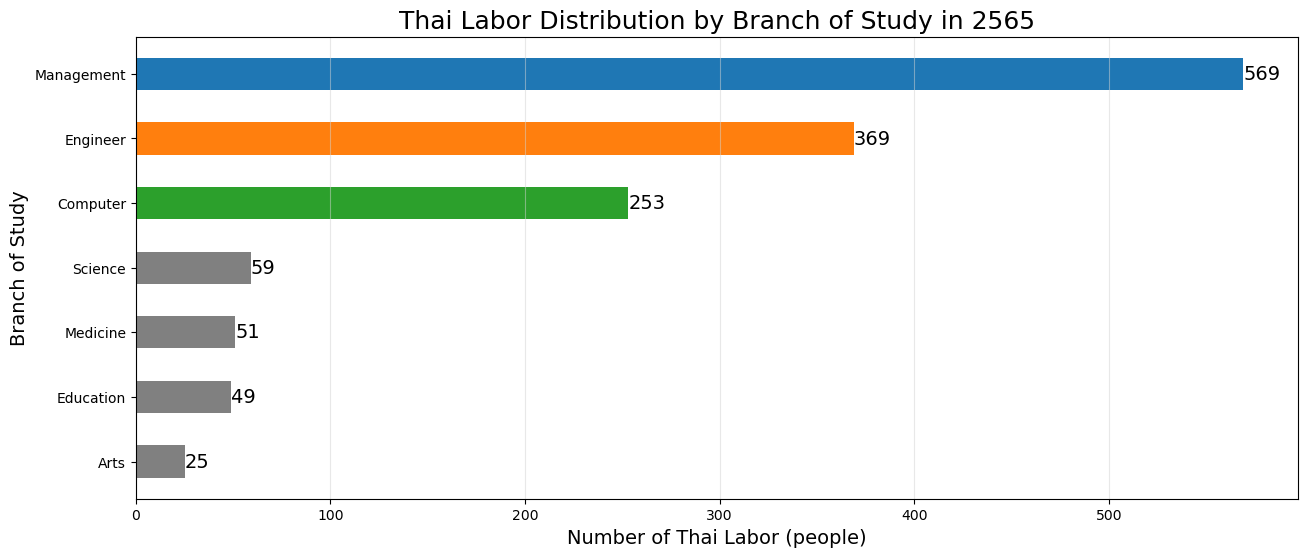

In [18]:
index_num = list_data_name.index('2565')
data = list_new_data[index_num]

data = data[data['Major'] != 'need_all']
data = data.sort_values(by='Thai', ascending= False)
data = data.head(7)
data = data.reset_index(drop= True)

matplotlib.pyplot.figure(figsize=(15, 6))
sns.barplot(x='Thai', y='Major', data= data, width = 0.5)

for i in data.index:
    if i > data.index[2]:
        matplotlib.pyplot.barh(y=data['Major'][i], width=data['Thai'][i], color='gray', height=0.5)
    else:
        matplotlib.pyplot.barh(y=data['Major'][i], width=data['Thai'][i], alpha= 1, height=0.5)

matplotlib.pyplot.xlabel('Number of Thai Labor (people)', fontsize = 14)
matplotlib.pyplot.ylabel('Branch of Study', fontsize = 14)
matplotlib.pyplot.title(f'Thai Labor Distribution by Branch of Study in {list_data_name[index_num]}', fontsize = 18)
matplotlib.pyplot.gca().xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

for i, value in enumerate(data['Thai']):
    matplotlib.pyplot.text(value, i, str(value), va='center', fontsize = 14)
    
matplotlib.pyplot.show()

กราฟแสดงความเปลี่ยนแปลงความต้องการ การจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรี ตั้งแต่ปี 2563-2565
- ในปี 2563 วิศวกรรมมี demand การจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรี สูงที่สุด
- ในช่วงปี 2564-2565 บริหารธุรกิจมี demand การจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรี มากกว่าวิชาสาขาอื่น ๆ และมีแนวโน้มเพิ่มสูงมากขึ้น
- จากกราฟจะแสดงให้เห็นว่า demand การจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรี มีแนวโน้มเพิ่มขึ้นในทุก ๆ ปี ซึ่งบริหารธุรกิจมีแนวโน้มเพิ่มขึ้นสูงมากที่สุด

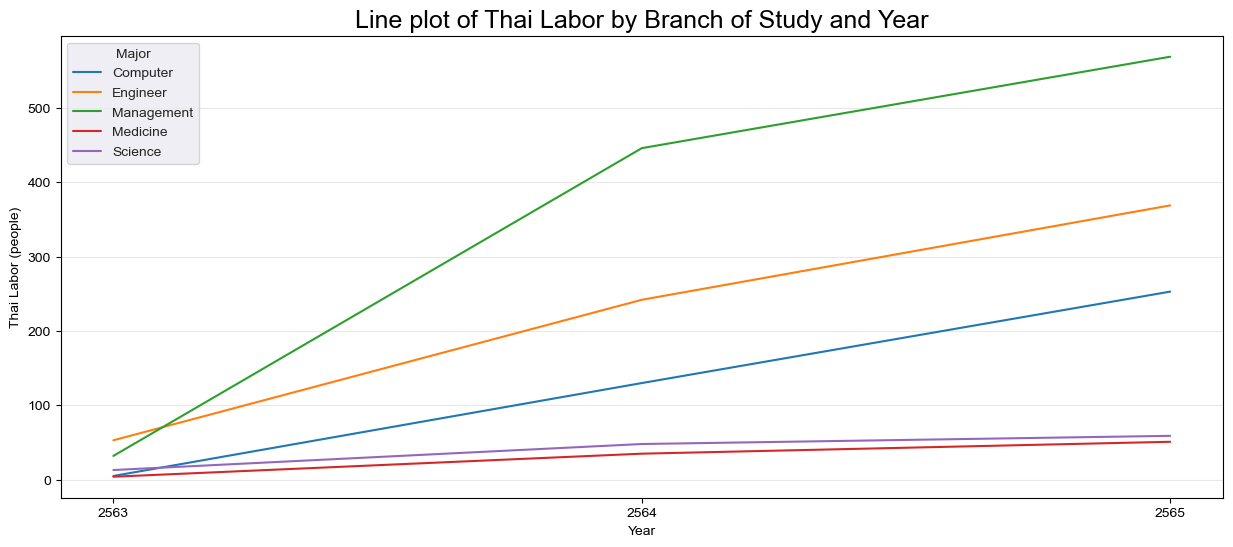

In [19]:
year_major_group = year_with_timestamp.groupby(['Year', 'Major'])['Thai'].sum().reset_index()

top_5_majors = year_major_group['Major'].value_counts().head(6).index.tolist()
top_5_data = year_major_group[(year_major_group['Major'].isin(top_5_majors)) & (year_major_group['Major'] != 'need_all')]

matplotlib.pyplot.figure(figsize=(15, 6))
matplotlib.pyplot.title('Line plot of Thai Labor by Branch of Study and Year', fontsize = 18)

sns.set_style("darkgrid")
sns.lineplot(x ='Year', y ='Thai', hue = 'Major', data = top_5_data)
matplotlib.pyplot.xticks(year_with_timestamp['Year'].unique())
matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('Thai Labor (people)')

matplotlib.pyplot.gca().yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

matplotlib.pyplot.show()

กราฟที่แสดงให้เห็นการเปรียบเทียบของ 2 ปี
- สีชมพูอ่อน หมายถึง ปริมาณที่เพิ่มขึ้นจาก year1 
- สีน้ำเงิน หมายถึง ปริมาณที่ลดลงจาก year1
- สีม่วง หมายถึง ปริมาณของ year1 และ year2 ซ้อนทับกัน

In [20]:
@ipywidgets.interact(year1= list_data_name, year2 = list_data_name)
def my_graph(year1, year2):
    if year2 >= year1:
        index_num1 = list_data_name.index(year1)
        data1 = list_new_data[index_num1]
        index_num2 = list_data_name.index(year2)
        data2 = list_new_data[index_num2]

        matplotlib.pyplot.figure(figsize=(15, 6))
        matplotlib.pyplot.bar(data1['Major'], data1['Thai'], color='blue', alpha=0.8, label= year1)
        matplotlib.pyplot.bar(data2['Major'], data2['Thai'], color='red', alpha=0.4, label= year2)
        matplotlib.pyplot.xlabel('Major')
        matplotlib.pyplot.ylabel('Thai labor (people)')
        matplotlib.pyplot.title('Thai Labor Demand by Major')
        matplotlib.pyplot.yticks(np.arange(0, max(data1['Thai'].max(), data2['Thai'].max()), 20))
        matplotlib.pyplot.legend()
        matplotlib.pyplot.show()
    else:
        print("year2 must have more or equal than year1")

interactive(children=(Dropdown(description='year1', options=('2563', '2564', '2565'), value='2563'), Dropdown(…

<div style="text-align:center">
  <img src="https://raw.githubusercontent.com/Comrade26/Interesting_data_project/main/team7_assgn1/JBP.jpg" alt="alt text">
</div>

รวมความต้องการการจ้างงานในแรงงานไทยของแต่ละวิชาสาขา ป.ตรี ตั้งแต่ปี 2563-2565 
- รวมความต้องการการจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรี ของบริหารธุรกิจมี 1,047 คน ซึ่งมากกว่าวิศวกรรม เกือบ 400 คน และมากกว่าคอมพิวเตอร์ เกือบ 700 คน
- คอมพิวเตอร์ที่อยู่อันดับ 3 รวมความต้องการการจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรี ซึ่งมากกว่าอันดับที่ 4 วิทยาศาสตร์ มากถึง 3 เท่า
- ทำให้เห็นถึง demand รวมความต้องการการจ้างงานแรงงานไทยของแต่ละวิชาสาขาในช่วงปัจจุบันที่อาจจะมีแนวโน้มเพิ่มขึ้น ของสาขาวิชาบริหารธุรกิจ, วิศวกรรม และคอมพิวเตอร์

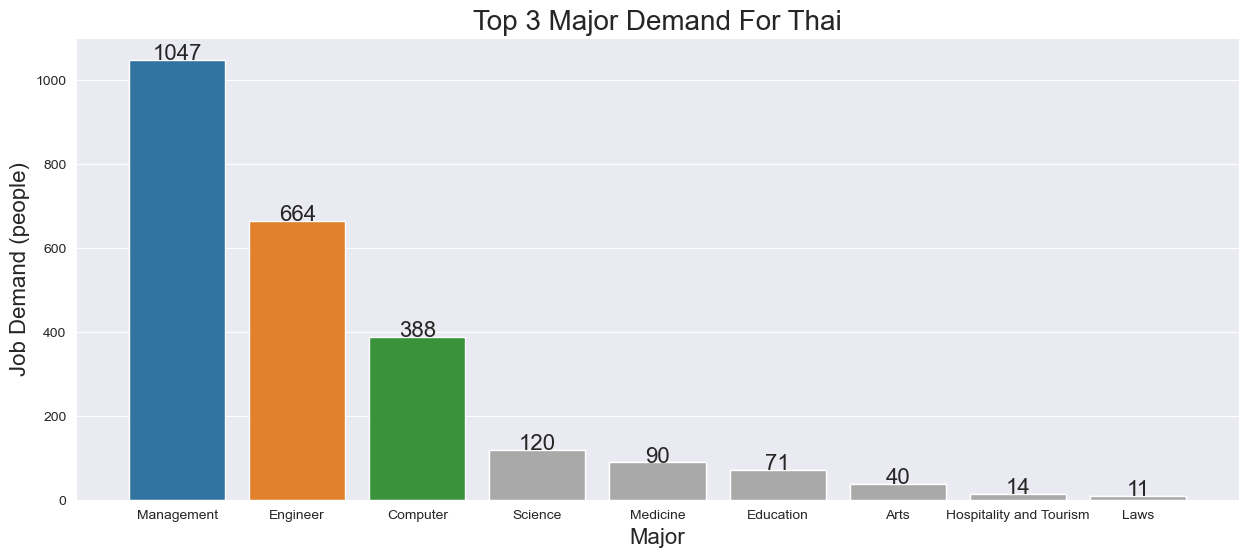

In [21]:
new_data_all_10 = all_new_data.head(10)
new_data_all_10 = new_data_all_10[new_data_all_10.Major != 'need_all']

matplotlib.pyplot.figure(figsize = (15, 6))
sns.barplot(x='Major', y='Thai', data=new_data_all_10)
for index, value in enumerate(new_data_all_10['Thai']):
    matplotlib.pyplot.text(index, value, str(value), fontsize = 16, ha = 'center')
    if index > 2:
        matplotlib.pyplot.bar(index, value, color='darkgray')

matplotlib.pyplot.title("Top 3 Major Demand For Thai", fontsize = 20)
matplotlib.pyplot.xlabel("Major", fontsize = 16)
matplotlib.pyplot.ylabel("Job Demand (people)", fontsize = 16)

matplotlib.pyplot.grid(visible = True, axis = 'y')

matplotlib.pyplot.show()

การเปรียบเทียบระหว่างผู้ชายและผู้หญิงในแต่ละสาขาวิชา
- จากกราฟ จะเห็นได้ว่า ความต้องการการจ้างงานแรงงานไทยของแต่ละวิชาสาขา ป.ตรีของวิศวกรรมและคอมพิวเตอร์มีจำนวนผู้ชายมากกว่าเมื่อเทียบเป็นเปอร์เซนต์ของแต่ละสาขาวิชา
- บริหารธุรกิจมีจำนวนผู้หญิงมากกว่าเมื่อเทียบเป็นเปอร์เซนต์ของแต่ละสาขาวิชา
- ทำให้เห็นผลลัพธ์จากการทำงานของชายและหญิงที่แตกต่างกัน โดยผู้หญิงมักจะทำงานประเภทเกี่ยวกับที่ต้องมีการพบปะผู้คนเป็นส่วนใหญ่ ในขณะที่ผู้ชายมักจะทำงานที่มีสิ่งของ

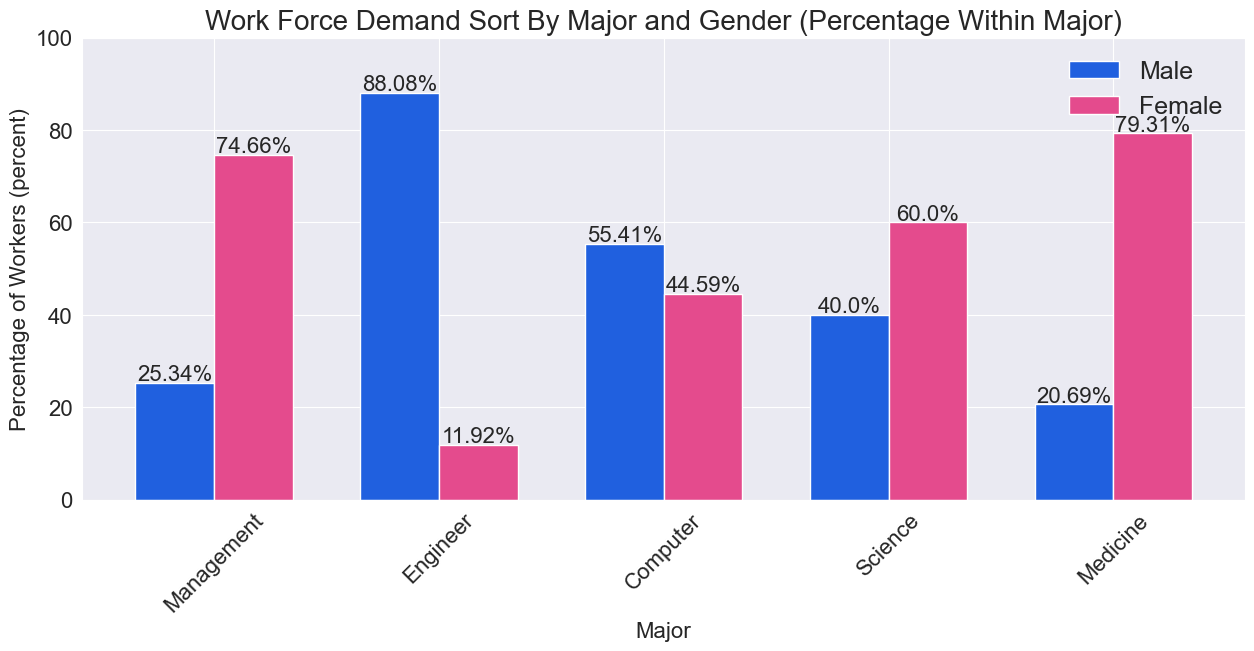

In [22]:
new_data_all = all_new_data.sort_values(by='Thai', ascending=False).head(6)
new_data_all = new_data_all[new_data_all.Major != 'need_all']

new_data_all = new_data_all.reset_index()
for i in range(len(new_data_all)):
    total = (new_data_all.at[i, "Male"] + new_data_all.at[i, "Female"])
    new_data_all.at[i, "Male"] = (new_data_all.at[i, "Male"] / total) * 100
    new_data_all.at[i, "Female"] = (new_data_all.at[i, "Female"] / total) * 100

index = np.arange(len(new_data_all.index))
bar_width = 0.35

fig, ax = matplotlib.pyplot.subplots(figsize = (15,6))
male = ax.bar(index, new_data_all["Male"], bar_width, label="Male", color = "#2060df")
female = ax.bar(index + bar_width, new_data_all["Female"], bar_width, label="Female", color = "#e44b8d")

for i, v in enumerate(male):
    ax.text(i, v.get_height()+0.5, str(round(v.get_height(), 2)) + '%', fontsize = 16, ha='center')
for i, v in enumerate(female):
    ax.text(i  + bar_width, v.get_height()+0.5, str(round(v.get_height(), 2)) + '%', fontsize = 16, ha='center')

matplotlib.pyplot.title("Work Force Demand Sort By Major and Gender (Percentage Within Major)", fontsize=20)
matplotlib.pyplot.xticks(index + bar_width/2, new_data_all.Major, fontsize=16, rotation=45)
matplotlib.pyplot.xlabel("Major", fontsize=16)
matplotlib.pyplot.ylabel("Percentage of Workers (percent)", fontsize=16)
matplotlib.pyplot.legend(loc='best', fontsize=18, frameon=False)

matplotlib.pyplot.yticks(fontsize=16)
matplotlib.pyplot.ylim(0, 100) # set y-axis limit to 100
matplotlib.pyplot.show()